### Import the data file
#### Load the txt file with json format:
This data, which is in line-delimited JSON format, can be found at https://github.com/CapitalOneRecruiting/DS

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('credit').getOrCreate()

In [2]:
data = spark.read.json(r"C:\Users\bnmwe\Desktop\Python-and-Spark-for-Big-Data-master\project\transactions.txt")

In [3]:
print(data.count(), len(data.columns))

786363 29


Take a glimpse on the data:

In [4]:
import pandas as pd
pd.DataFrame(data.take(5), columns=data.columns).transpose()

,0,1,2,3,4
accountNumber,737265056,737265056,737265056,737265056,830329091
accountOpenDate,2015-03-14,2015-03-14,2015-03-14,2015-03-14,2015-08-06
acqCountry,US,US,US,US,US
availableMoney,5000,5000,5000,5000,5000
cardCVV,414,486,486,486,885
cardLast4Digits,1803,767,767,767,3143
cardPresent,False,True,False,False,True
creditLimit,5000,5000,5000,5000,5000
currentBalance,0,0,0,0,0
currentExpDate,06/2023,02/2024,08/2025,08/2025,10/2029


In [5]:
for item in data.head(2):
    print(item)
    print('\n')

Row(accountNumber='737265056', accountOpenDate='2015-03-14', acqCountry='US', availableMoney=5000.0, cardCVV='414', cardLast4Digits='1803', cardPresent=False, creditLimit=5000.0, currentBalance=0.0, currentExpDate='06/2023', customerId='737265056', dateOfLastAddressChange='2015-03-14', echoBuffer='', enteredCVV='414', expirationDateKeyInMatch=False, isFraud=False, merchantCategoryCode='rideshare', merchantCity='', merchantCountryCode='US', merchantName='Uber', merchantState='', merchantZip='', posConditionCode='01', posEntryMode='02', posOnPremises='', recurringAuthInd='', transactionAmount=98.55, transactionDateTime='2016-08-13T14:27:32', transactionType='PURCHASE')


Row(accountNumber='737265056', accountOpenDate='2015-03-14', acqCountry='US', availableMoney=5000.0, cardCVV='486', cardLast4Digits='767', cardPresent=True, creditLimit=5000.0, currentBalance=0.0, currentExpDate='02/2024', customerId='737265056', dateOfLastAddressChange='2015-03-14', echoBuffer='', enteredCVV='486', expi

In [6]:
data.printSchema()

root
 |-- accountNumber: string (nullable = true)
 |-- accountOpenDate: string (nullable = true)
 |-- acqCountry: string (nullable = true)
 |-- availableMoney: double (nullable = true)
 |-- cardCVV: string (nullable = true)
 |-- cardLast4Digits: string (nullable = true)
 |-- cardPresent: boolean (nullable = true)
 |-- creditLimit: double (nullable = true)
 |-- currentBalance: double (nullable = true)
 |-- currentExpDate: string (nullable = true)
 |-- customerId: string (nullable = true)
 |-- dateOfLastAddressChange: string (nullable = true)
 |-- echoBuffer: string (nullable = true)
 |-- enteredCVV: string (nullable = true)
 |-- expirationDateKeyInMatch: boolean (nullable = true)
 |-- isFraud: boolean (nullable = true)
 |-- merchantCategoryCode: string (nullable = true)
 |-- merchantCity: string (nullable = true)
 |-- merchantCountryCode: string (nullable = true)
 |-- merchantName: string (nullable = true)
 |-- merchantState: string (nullable = true)
 |-- merchantZip: string (nullable =

#### Cast data type:

In [7]:
from pyspark.sql.types import IntegerType, DoubleType, DateType
from pyspark.sql.functions import to_date, to_timestamp
from pyspark.sql import functions as F
from pyspark.sql.functions import col, countDistinct

In [8]:
for column in ['accountNumber', 'cardCVV', 'cardLast4Digits', 'enteredCVV']:
    data = data.withColumn(column, data[column].cast(IntegerType())) 

In [9]:
for column in ['accountOpenDate', 'dateOfLastAddressChange']:
    data = data.withColumn(column, F.to_date(data[column], 'yyyy-MM-dd'))

In [10]:
for column in ['currentExpDate']:
    data = data.withColumn(column, F.to_date(data[column], 'MM/yyyy'))

In [11]:
for column in ['transactionDateTime']:
    data = data.withColumn(column, F.to_timestamp(data[column], "yyyy-MM-dd'T'HH:mm:ss"))

In [12]:
data.dtypes

[('accountNumber', 'int'),
 ('accountOpenDate', 'date'),
 ('acqCountry', 'string'),
 ('availableMoney', 'double'),
 ('cardCVV', 'int'),
 ('cardLast4Digits', 'int'),
 ('cardPresent', 'boolean'),
 ('creditLimit', 'double'),
 ('currentBalance', 'double'),
 ('currentExpDate', 'date'),
 ('customerId', 'string'),
 ('dateOfLastAddressChange', 'date'),
 ('echoBuffer', 'string'),
 ('enteredCVV', 'int'),
 ('expirationDateKeyInMatch', 'boolean'),
 ('isFraud', 'boolean'),
 ('merchantCategoryCode', 'string'),
 ('merchantCity', 'string'),
 ('merchantCountryCode', 'string'),
 ('merchantName', 'string'),
 ('merchantState', 'string'),
 ('merchantZip', 'string'),
 ('posConditionCode', 'string'),
 ('posEntryMode', 'string'),
 ('posOnPremises', 'string'),
 ('recurringAuthInd', 'string'),
 ('transactionAmount', 'double'),
 ('transactionDateTime', 'timestamp'),
 ('transactionType', 'string')]

Data distinct count:

In [13]:
# show distinct counts for each column
data.select(* (countDistinct(column).alias(column) for column in data.columns)).toPandas().transpose()

,0
accountNumber,5000
accountOpenDate,1820
acqCountry,5
availableMoney,521916
cardCVV,899
cardLast4Digits,5245
cardPresent,2
creditLimit,10
currentBalance,487318
currentExpDate,165


### Clean data
The purpose of data cleaning is to check if there is any invalid or missing values, and eliminate those reords. It seems all the Null values are stored as empty strings. We will replace them with None and check their statistic.
#### Check the null values:  


In [14]:
data = data.replace("", None)

In [15]:
for column in data.columns:
    print(column + ": " + str(data.filter(data[column].isNull()).count()))

accountNumber: 0
accountOpenDate: 0
acqCountry: 4562
availableMoney: 0
cardCVV: 0
cardLast4Digits: 0
cardPresent: 0
creditLimit: 0
currentBalance: 0
currentExpDate: 0
customerId: 0
dateOfLastAddressChange: 0
echoBuffer: 786363
enteredCVV: 0
expirationDateKeyInMatch: 0
isFraud: 0
merchantCategoryCode: 0
merchantCity: 786363
merchantCountryCode: 724
merchantName: 0
merchantState: 786363
merchantZip: 786363
posConditionCode: 409
posEntryMode: 4054
posOnPremises: 786363
recurringAuthInd: 786363
transactionAmount: 0
transactionDateTime: 79
transactionType: 698


Drop columns with all null values：

In [16]:
null_cols = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' ]
data = data.drop(*null_cols)
print(len(data.columns))

23


Drop rows with null values：

In [17]:
data = data.filter(data['posConditionCode'].isNotNull() & data['posEntryMode'].isNotNull() & 
                   data['transactionType'].isNotNull() & data['merchantCountryCode'].isNotNull() & 
                   data['acqCountry'].isNotNull() & data['transactionDateTime'].isNotNull())

# https://sparkbyexamples.com/spark/spark-dataframe-drop-rows-with-null-values/

### Summary statistics for features

In [18]:
continous_columns = ['availableMoney','creditLimit','currentBalance','transactionAmount']
data.select(continous_columns).describe().show()

+-------+-----------------+------------------+-----------------+------------------+
|summary|   availableMoney|       creditLimit|   currentBalance| transactionAmount|
+-------+-----------------+------------------+-----------------+------------------+
|  count|           776589|            776589|           776589|            776589|
|   mean|6247.687344399638|10756.374027960735|4508.686683561073|136.97425724546807|
| stddev|8873.961393399715|11631.556271415433|6457.442291671901|147.69897004209136|
|    min|         -1005.63|             250.0|              0.0|               0.0|
|    max|          50000.0|           50000.0|         47498.81|           2011.54|
+-------+-----------------+------------------+-----------------+------------------+



In [19]:
# Statistics of fraudulent transaction amounts
data_fraud = data.filter(data.isFraud == True)
data_fraud.describe('transactionAmount').show()

+-------+-----------------+
|summary|transactionAmount|
+-------+-----------------+
|  count|            11965|
|   mean|224.7734625992477|
| stddev|189.3241167493438|
|    min|              0.0|
|    max|          1608.35|
+-------+-----------------+



In [20]:
#Types of the fraudulent transactions
data_fraud.groupBy(data_fraud['transactionType']).count().show()

+--------------------+-----+
|     transactionType|count|
+--------------------+-----+
|            REVERSAL|  324|
|            PURCHASE|11527|
|ADDRESS_VERIFICATION|  114|
+--------------------+-----+



In [21]:
categorical_columns =  ['accountNumber', 'acqCountry', 'cardCVV', 'cardLast4Digits', 'cardPresent', 'customerId', 'enteredCVV',
                        'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode', 'posConditionCode','posEntryMode',
                        'transactionType']
for column in categorical_columns:
    data.groupBy(column).count().show(5)

+-------------+-----+
|accountNumber|count|
+-------------+-----+
|    181831477|   41|
|    110625245|    3|
|    668920668|   35|
|    201956682|   13|
|    800749810|    4|
+-------------+-----+
only showing top 5 rows

+----------+------+
|acqCountry| count|
+----------+------+
|       MEX|  3110|
|        US|769541|
|       CAN|  2406|
|        PR|  1532|
+----------+------+

+-------+-----+
|cardCVV|count|
+-------+-----+
|    148|  290|
|    463|  499|
|    496| 1616|
|    833|  875|
|    471|  446|
+-------+-----+
only showing top 5 rows

+---------------+-----+
|cardLast4Digits|count|
+---------------+-----+
|           5156|  135|
|           6397|   25|
|            471|    1|
|           1238|   22|
|           7754|   18|
+---------------+-----+
only showing top 5 rows

+-----------+------+
|cardPresent| count|
+-----------+------+
|       true|348471|
|      false|428118|
+-----------+------+

+----------+-----+
|customerId|count|
+----------+-----+
| 371832344|   54|
| 2

### univariate analysis on continous variables
plot histograms of the transaction amount, available money and current balance

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

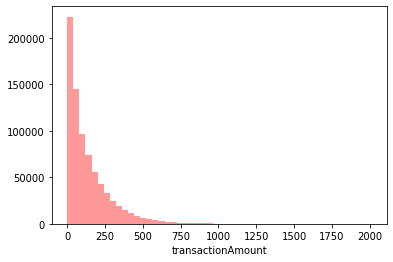

In [23]:
sns.distplot(data.toPandas()['transactionAmount'], color = 'red', kde=False, bins=50)

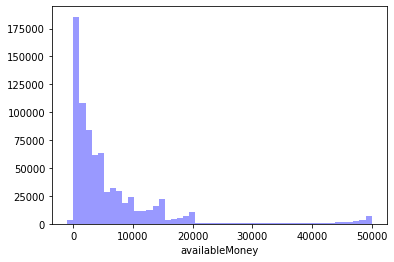

In [24]:
sns.distplot(data.toPandas()['availableMoney'], color = 'blue', kde=False, bins=50)

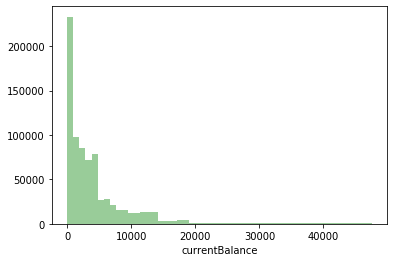

In [25]:
sns.distplot(data.toPandas()['currentBalance'], color = 'green', kde=False, bins=50)

Note: There is a big peak near 0 for all of three distribution. The shapes look like a power-law or exponential decay.  

In [26]:
#Fraud frequency distribution:
Fraud_Freq = data.groupBy('isFraud').count()
Fraud_Freq.show()

+-------+------+
|isFraud| count|
+-------+------+
|   true| 11965|
|  false|764624|
+-------+------+



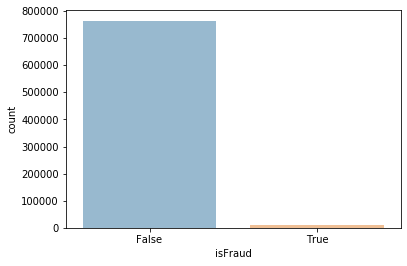

In [27]:
sns.barplot(data = Fraud_Freq.toPandas(), x = 'isFraud', y = 'count', alpha = 0.5)

In [28]:
fraudRate = data.toPandas()['isFraud'].mean()*100
fraudRate

1.5407120111152746

In [29]:
# Dealing with imbanance samples:
import pandas as pd
new_data= data.toPandas()
new_data= new_data.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = new_data.loc[new_data['isFraud'] == True]
non_fraud_df = new_data.loc[new_data['isFraud'] == False][:11965]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.shape

(23930, 23)

### Feature engieering
#### date differance:
The difference in dates between two date features can be a more sensitive indicator of a trend that a machine learning model can capture.

In [30]:
data = spark.createDataFrame(new_df)
from pyspark.sql.functions import datediff

In [31]:
data = data.withColumn('days_diff', datediff('transactionDateTime', 'accountOpenDate'))
data.select(['transactionDateTime', 'accountOpenDate', 'days_diff']).show(10)

+-------------------+---------------+---------+
|transactionDateTime|accountOpenDate|days_diff|
+-------------------+---------------+---------+
|2016-07-14 12:11:12|     2015-09-22|      296|
|2016-12-15 17:23:26|     2012-04-11|     1709|
|2016-08-17 01:24:50|     2014-06-04|      805|
|2016-10-09 09:31:38|     2014-06-21|      841|
|2016-05-18 14:45:57|     2015-03-17|      428|
|2016-08-27 01:55:09|     2015-05-26|      459|
|2016-04-11 12:47:56|     2014-12-27|      471|
|2016-08-25 20:45:37|     2012-04-22|     1586|
|2016-10-12 18:52:38|     2014-04-23|      903|
|2016-05-18 06:36:52|     2015-12-19|      151|
+-------------------+---------------+---------+
only showing top 10 rows



#### Time component:
Individual aspects of a date-time can be very relevant features for training machine learning models.These include such aspects as day of week, day of year, week of year, month of year, and so on 

In [32]:
from pyspark.sql.functions import dayofweek, hour

In [33]:
data = data.withColumn('dayofweek', hour('transactionDateTime'))
data = data.withColumn('hour', hour('transactionDateTime'))

#### Feature selection:
All features aren't equal! It is all about selecting a small subset of features from a large pool of features. We select those attributes which best explain the relationship of an independent variable with the target variable.

In [34]:
df = data.select('cardPresent', 'expirationDateKeyInMatch', 'merchantCategoryCode', 'posConditionCode','posEntryMode',
                 'transactionType', 'isFraud', 'availableMoney', 'currentBalance', 'transactionAmount', 'days_diff',
                 'dayofweek', 'hour')

In [35]:
import pandas as pd
df1 = df.toPandas()

In [36]:
features = []
threshold = 0.1
overall_fraud_rate = df1['isFraud'].mean() * 100
print("The overall fraud rate is: %5.3f percent " % overall_fraud_rate)

The overall fraud rate is: 50.000 percent 


In [37]:
for col in ['transactionType', 'merchantCategoryCode', 'posConditionCode','posEntryMode', 'expirationDateKeyInMatch','cardPresent']:
    print(col)
    for group, sub_df in df1.groupby(col):
        fraud_rate = sub_df['isFraud'].mean() * 100
        if abs((fraud_rate - overall_fraud_rate)/overall_fraud_rate) > threshold and group:
            col_name = col + "_" + str(group)
            df1[col_name] = (df1[col] == group)  # generate dummy columns
            features.append(col_name)
            print("group name: %20s, fraud percentage: %5.4f, total number: %10d selected as a feature!" % (group, fraud_rate, sub_df.shape[0]))
        else:
            print("group name: %20s, fraud percentage: %5.4f, total number: %10d" % (group, fraud_rate, sub_df.shape[0]))
    print()

transactionType
group name: ADDRESS_VERIFICATION, fraud percentage: 27.4699, total number:        415 selected as a feature!
group name:             PURCHASE, fraud percentage: 50.3824, total number:      22879
group name:             REVERSAL, fraud percentage: 50.9434, total number:        636

merchantCategoryCode
group name:              airline, fraud percentage: 67.9045, total number:        754 selected as a feature!
group name:                 auto, fraud percentage: 43.8538, total number:        602 selected as a feature!
group name:          cable/phone, fraud percentage: 0.0000, total number:         25 selected as a feature!
group name:        entertainment, fraud percentage: 43.0755, total number:       2159 selected as a feature!
group name:             fastfood, fraud percentage: 37.2875, total number:       2765 selected as a feature!
group name:                 food, fraud percentage: 45.6583, total number:       2142
group name:        food_delivery, fraud percentage:

In [38]:
df2 = df1.drop(['transactionType', 'merchantCategoryCode', 'posConditionCode','posEntryMode', 'expirationDateKeyInMatch', 'cardPresent'], axis = 1)

In [39]:
df2.columns

Index(['isFraud', 'availableMoney', 'currentBalance', 'transactionAmount',
       'days_diff', 'dayofweek', 'hour',
       'transactionType_ADDRESS_VERIFICATION', 'merchantCategoryCode_airline',
       'merchantCategoryCode_auto', 'merchantCategoryCode_cable/phone',
       'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
       'merchantCategoryCode_food_delivery', 'merchantCategoryCode_fuel',
       'merchantCategoryCode_gym', 'merchantCategoryCode_health',
       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps',
       'merchantCategoryCode_online_gifts',
       'merchantCategoryCode_online_retail',
       'merchantCategoryCode_online_subscriptions',
       'merchantCategoryCode_personal care', 'merchantCategoryCode_rideshare',
       'merchantCategoryCode_subscriptions', 'posConditionCode_08',
       'posConditionCode_99', 'posEntryMode_05', 'posEntryMode_09',
       'posEntryMode_90', 'expirationDateKeyInMatch_True', 'cardPresent_True'],
      

In [40]:
#convert pandas data frame back to pyspark data frame 
new_df = spark.createDataFrame(df2)

In [41]:
new_df.printSchema()

root
 |-- isFraud: boolean (nullable = true)
 |-- availableMoney: double (nullable = true)
 |-- currentBalance: double (nullable = true)
 |-- transactionAmount: double (nullable = true)
 |-- days_diff: long (nullable = true)
 |-- dayofweek: long (nullable = true)
 |-- hour: long (nullable = true)
 |-- transactionType_ADDRESS_VERIFICATION: boolean (nullable = true)
 |-- merchantCategoryCode_airline: boolean (nullable = true)
 |-- merchantCategoryCode_auto: boolean (nullable = true)
 |-- merchantCategoryCode_cable/phone: boolean (nullable = true)
 |-- merchantCategoryCode_entertainment: boolean (nullable = true)
 |-- merchantCategoryCode_fastfood: boolean (nullable = true)
 |-- merchantCategoryCode_food_delivery: boolean (nullable = true)
 |-- merchantCategoryCode_fuel: boolean (nullable = true)
 |-- merchantCategoryCode_gym: boolean (nullable = true)
 |-- merchantCategoryCode_health: boolean (nullable = true)
 |-- merchantCategoryCode_hotels: boolean (nullable = true)
 |-- merchantCateg

In [42]:
#convert boolean columns to string type
from pyspark.sql.types import StringType

bool_cols = [t[0] for t in new_df.dtypes if t[1] == 'boolean']
for col in bool_cols:
    new_df = new_df.withColumn(col, new_df[col].cast(StringType()))
cols = new_df.columns

In [43]:
new_df.printSchema()

root
 |-- isFraud: string (nullable = true)
 |-- availableMoney: double (nullable = true)
 |-- currentBalance: double (nullable = true)
 |-- transactionAmount: double (nullable = true)
 |-- days_diff: long (nullable = true)
 |-- dayofweek: long (nullable = true)
 |-- hour: long (nullable = true)
 |-- transactionType_ADDRESS_VERIFICATION: string (nullable = true)
 |-- merchantCategoryCode_airline: string (nullable = true)
 |-- merchantCategoryCode_auto: string (nullable = true)
 |-- merchantCategoryCode_cable/phone: string (nullable = true)
 |-- merchantCategoryCode_entertainment: string (nullable = true)
 |-- merchantCategoryCode_fastfood: string (nullable = true)
 |-- merchantCategoryCode_food_delivery: string (nullable = true)
 |-- merchantCategoryCode_fuel: string (nullable = true)
 |-- merchantCategoryCode_gym: string (nullable = true)
 |-- merchantCategoryCode_health: string (nullable = true)
 |-- merchantCategoryCode_hotels: string (nullable = true)
 |-- merchantCategoryCode_mobi

### Build the model
#### Transforming the data:  
We need to do some transformations on the data to use the machine learning algorithms provided by MlLib. The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

In [44]:
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler, StandardScaler

In [45]:
categoricalCols = ['transactionType_ADDRESS_VERIFICATION',
 'merchantCategoryCode_airline',
 'merchantCategoryCode_cable/phone',
 'merchantCategoryCode_entertainment',
 'merchantCategoryCode_fastfood',
 'merchantCategoryCode_food_delivery',
 'merchantCategoryCode_fuel',
 'merchantCategoryCode_gym',
 'merchantCategoryCode_health',
 'merchantCategoryCode_hotels',
 'merchantCategoryCode_mobileapps',
 'merchantCategoryCode_online_gifts',
 'merchantCategoryCode_online_retail',
 'merchantCategoryCode_online_subscriptions',
 'merchantCategoryCode_personal care',
 'merchantCategoryCode_rideshare',
 'merchantCategoryCode_subscriptions',
 'posConditionCode_99',
 'posEntryMode_05',
 'posEntryMode_09',
 'posEntryMode_90',
 'cardPresent_True']
#categoricalCols = [t[0] for t in new_df.dtypes if t[1] == 'string']
stages = []
for categoricalCol in categoricalCols:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'isFraud', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['availableMoney', 'currentBalance', 'transactionAmount', 'days_diff', 'dayofweek', 'hour']
assemblerInputs = [c + "classVec" for c in categoricalCols] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol= 'vectorized_features')
stages += [assembler]
scaler = StandardScaler(inputCol = 'vectorized_features', outputCol = 'features')
stages += [scaler]


#### Model pipeline:  
We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [46]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(new_df)
new_df = pipelineModel.transform(new_df)
selectedCols = ['label', 'features'] + cols
new_df = new_df.select(selectedCols)

#### Split data:
we will split the data randomly with proportion of 70% training set and 30% testing set. 

In [47]:
train, test = new_df.randomSplit([0.8, 0.2], seed = 2021) 

#### Exploring the classifier models:
We are going to explore Logistic regression, Random forest. After obtaining the trained models, we will use them to make predictions on the testing data and evaluate their performance using BinaryClassificationEvaluator. The default metric for the BinaryClassificationEvaluator is areaUnderROC.

##### Logistic Regression Model:

In [48]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label')
lrModel = lr.fit(train)
lrPredictions = lrModel.transform(test)
lrPredictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

,label,features,rawPrediction,prediction,probability
0,0.0,"[0.0, 5.724383353513153, 30.954175872958793, 0...","[-0.5609043597874859, 0.5609043597874859]",1.0,"[0.36333823414706284, 0.6366617658529371]"
1,0.0,"[0.0, 5.724383353513153, 30.954175872958793, 3...","[-0.959920222822717, 0.959920222822717]",1.0,"[0.27689416787990767, 0.7231058321200923]"
2,0.0,"[0.0, 5.724383353513153, 30.954175872958793, 3...","[-1.4199218727062544, 1.4199218727062544]",1.0,"[0.19467383177861308, 0.8053261682213868]"
3,0.0,"[7.660146653126026, 0.0, 30.954175872958793, 3...","[1.6476003727105706, -1.6476003727105706]",0.0,"[0.8385664701451536, 0.16143352985484635]"
4,0.0,"[7.660146653126026, 0.0, 30.954175872958793, 3...","[2.2581990390142437, -2.2581990390142437]",0.0,"[0.9053554247593525, 0.09464457524064762]"


##### Model evaluation:

In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
lrEvaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction', labelCol = 'label')

In [50]:
print('AUC: ', lrEvaluator.evaluate(lrPredictions))

AUC:  0.6853777816549307


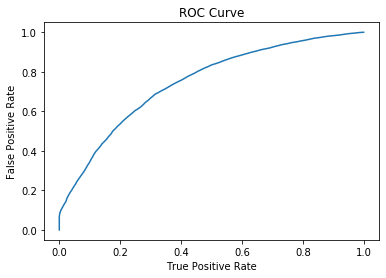

Training set areaUnderROC: 0.745652323583937


In [51]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

In [52]:
accuracy = lrPredictions.filter(lrPredictions.label == lrPredictions.prediction).count() / float(lrPredictions.count())
print("Accuracy : ",accuracy)

Accuracy :  0.6855886049434436


##### Random Forest Model:

In [53]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
rfPredictions = rfModel.transform(test)

In [54]:
rfPredictions.select('label', 'features', 'rawPrediction', 'prediction', 'probability').toPandas().head(5)

,label,features,rawPrediction,prediction,probability
0,0.0,"[0.0, 5.724383353513153, 30.954175872958793, 0...","[6.9804222651237176, 13.019577734876286]",1.0,"[0.3490211132561858, 0.6509788867438142]"
1,0.0,"[0.0, 5.724383353513153, 30.954175872958793, 3...","[7.5261772783414616, 12.47382272165854]",1.0,"[0.3763088639170731, 0.6236911360829269]"
2,0.0,"[0.0, 5.724383353513153, 30.954175872958793, 3...","[6.790350971362435, 13.209649028637564]",1.0,"[0.3395175485681218, 0.6604824514318782]"
3,0.0,"[7.660146653126026, 0.0, 30.954175872958793, 3...","[8.096790519574654, 11.903209480425346]",1.0,"[0.4048395259787327, 0.5951604740212673]"
4,0.0,"[7.660146653126026, 0.0, 30.954175872958793, 3...","[12.846075429710242, 7.15392457028976]",0.0,"[0.6423037714855121, 0.357696228514488]"


In [55]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
rfEvaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction', labelCol = 'label', metricName= 'areaUnderROC')

In [56]:
print('AUC: ', rfEvaluator.evaluate(rfPredictions))

AUC:  0.6785134363536569


##### GBTClassifier Model:


In [57]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'label')
gbtModel = gbt.fit(train)
gbtPredictions = gbtModel.transform(test)

In [58]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
gbtEvaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction', labelCol = 'label')

In [59]:
print('AUC: ', gbtEvaluator.evaluate(gbtPredictions))

AUC:  0.7030413047267313


##### Parameter Tuning and Cross Validation:
Gradient-Boosted Tree achieved the best results, we will try tuning this model with the ParamGridBuilder and the CrossValidator. Before that we can use explainParams() to print a list of all params and their definitions to understand what params available for tuning.

In [60]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [62]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=gbtEvaluator, numFolds=5)
# Run cross validations. This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
gbtEvaluator.evaluate(predictions)

0.7048941469948447

### Conclusion:

Gradient-Boosted Tree performs better than logistic regression and random forest (a larger AUC value) in our data set to detect credit card fraud . In the future, it is possible to further test on other models, and adjust some hyperparameters to fine tune the model.